In [1]:
from spacerocks import SpaceRock, Units, Orbfit
import numpy as np

from astropy import units as u

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
units = Units()
units.angle = 'deg'

rocks = SpaceRock(a=500, 
                  e=0.9, 
                  inc=10, 
                  node=18, 
                  arg=23, 
                  M=0.34,
                  epoch=2459305.5, 
                  frame='barycentric',
                  units=units)

p, planets, sim = rocks.propagate(epochs=np.linspace(2459305.5, 2459305.5 + (3/12) * 365.25, 10), model=2)
obs = p.observe(obscode='807')

In [3]:
units = Units()
units.ra = u.deg
units.dec = u.deg

o = Orbfit(ra=obs.ra.deg, dec=obs.dec.deg, epoch=obs.epoch.jd, obscode=807, units=units)

In [4]:
elements, errs = o.get_elements()

In [5]:
elements, errs

({'a': 496.5783051515163,
  'e': 0.8992702758554976,
  'i': 9.999721376521375,
  'lan': 17.998676502038762,
  'aop': 23.18651757752903,
  'top': 2455497.9126326754},
 {'a': 84.0434965213606,
  'e': 0.01707788357722812,
  'i': 0.021550109509562203,
  'lan': 0.09588349177302757,
  'aop': 1.553364289336072,
  'top': 390.77272668039745})

In [6]:
rock = o.spacerock

In [7]:
pred = o.predict_pos(np.linspace(2459455.5, 2459455.5 + 1 * 365, 100))

In [8]:
pred.err_a.arcsec

array([ 1.87052654,  2.07017854,  2.2808735 ,  2.50283164,  2.73611867,
        2.98006816,  3.23446498,  3.49940859,  3.77426517,  4.05849685,
        4.35213018,  4.65455743,  4.96480658,  5.28257671,  5.60734735,
        5.93799699,  6.27398295,  6.61492727,  6.95965867,  7.30721008,
        7.65711497,  8.00826929,  8.35946033,  8.71023046,  9.05978615,
        9.40680374,  9.75061025, 10.09058325, 10.42538995, 10.75416723,
       11.07659273, 11.39169435, 11.69851774, 11.99683364, 12.28598053,
       12.56490858, 12.83336578, 13.09116331, 13.33751801, 13.57219535,
       13.79535825, 14.00647961, 14.20517773, 14.39177661, 14.56618044,
       14.72810213, 14.878034  , 15.0163308 , 15.14277406, 15.2577272 ,
       15.36181238, 15.45501978, 15.5376713 , 15.61069292, 15.67443957,
       15.7291218 , 15.77563622, 15.81457851, 15.84609116, 15.87100188,
       15.89027042, 15.90419991, 15.9134416 , 15.91905829, 15.92144599,
       15.92098535, 15.91873732, 15.91539571, 15.91129046, 15.90

---

In [9]:
clones = o.clone(1000)

In [10]:
x, y, z = clones.orbits()
rx, ry, rz = rocks.orbits()

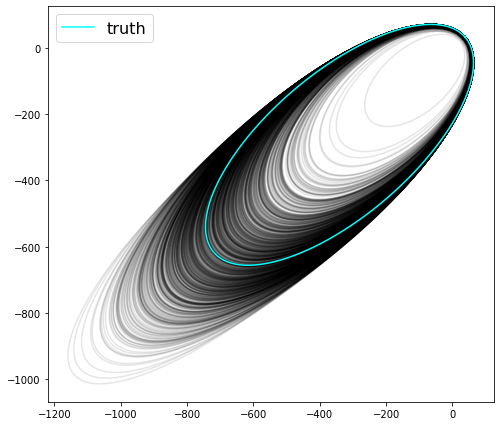

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx in range(len(x)):
    ax.plot(x[idx], y[idx], color='black', alpha=0.1)
    
ax.plot(rx[0].value, ry[0].value, color='cyan', zorder=4, label='truth')
ax.set_aspect('equal')
ax.legend(fontsize=16)